<h3>Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.</h3>

Изучить способы предварительной обработки данных для дальнейшего формирования моделей.

<h6> Задание:

<ol>
    <li>Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)</li>
    <li>
        Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
        <ul>
            <li>
                Обработку пропусков в данных;
            </li>
            <li>
                кодирование категориальных признаков;
            </li>
            <li>
                масштабирование данных.
            </li>
        </ul>
    </li>
    </ol>

Подлкючим необходимые библиотеки:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline 

Загрузим наш датасет

In [5]:
data = pd.read_csv("./melb_data 2.csv", sep=',')
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [7]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 13580


In [9]:
num_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count > 0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Car. Тип данных float64. Количество пустых значений 62, 0.46%.
Колонка BuildingArea. Тип данных float64. Количество пустых значений 6450, 47.5%.
Колонка YearBuilt. Тип данных float64. Количество пустых значений 5375, 39.58%.


In [10]:
data_num = data[num_cols]
data_num

,Car,BuildingArea,YearBuilt
0,1.0,NaN,NaN
1,0.0,79.0,1900.0
2,0.0,150.0,1900.0
3,1.0,NaN,NaN
4,2.0,142.0,2014.0
...,...,...,...
13575,2.0,NaN,1981.0
13576,2.0,133.0,1995.0
13577,4.0,NaN,1997.0
13578,5.0,157.0,1920.0


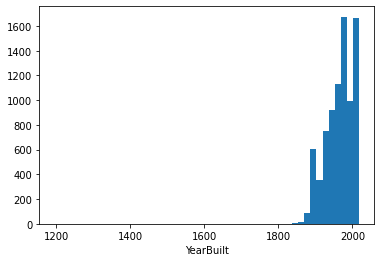

In [11]:
plt.hist(data['YearBuilt'], 50)
plt.xlabel('YearBuilt')
plt.show()

In [ ]:
med_imp = sklearn.impute.SimpleImputer(strategy="mean")
med_rat = med_imp.fit_transform(data[['YearBuilt']])
plt.hist(med_rat, 50)
plt.xlabel('YearBuilt')
plt.show()

Если не подставлять не внедрять значения, а удалить строки имеющие пропуски то мы теряем большую половину нашего датасета

In [ ]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

<h3> Обработка пропусков в категориальных данных</h3>

In [ ]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

In [ ]:
data['CouncilArea'].unique()

In [ ]:
temp_data = data[['CouncilArea']]
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(temp_data)
data_imp3

In [ ]:
np.unique(data_imp3)

<h2>Масштабирование данных</h2>

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

Методом min-max 

In [ ]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Price']])

In [ ]:
plt.hist(sc1_data, 50)
plt.show()

<h3>Кодирование категорий целочисленными значениями</h3>

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
temp_enc = pd.DataFrame({'Area':data['CouncilArea']})
temp_enc

In [ ]:
#label encoding
le = LabelEncoder()
cat_enc_le = le.fit_transform(temp_enc['Area'])
cat_enc_le

In [ ]:
#one-hot encoding
pd.get_dummies(temp_enc).head()